<a href="https://colab.research.google.com/github/jaden-2/Assignment/blob/master/MtFujiDescend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
import numpy as np
import matplotlib.pyplot as plt

In [302]:

data = np.loadtxt("/content/mtfuji_data.csv", delimiter=",", skiprows=1)


### Problem 1

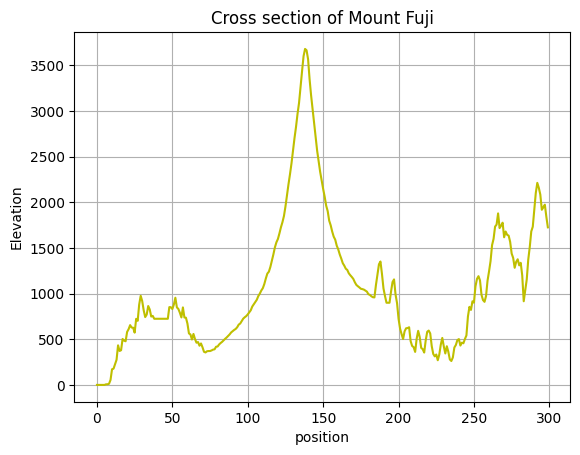

In [303]:
points = data[:, :1]
elevations = data[:, 3:4]


plt.plot(points, elevations, "y")

plt.title("Cross section of Mount Fuji")
plt.xlabel("position")
plt.ylabel("Elevation")
plt.grid(True)
plt.show()

### Problem 2

In [304]:
def gradient(position):
  """"Returns the gradient at position"""
  data = np.loadtxt("/content/mtfuji_data.csv", delimiter=",", skiprows=1)
  elevations = data[:, 3:4]

  try:
    if abs(position) >= elevations.size:
      raise IndexError

    if position == 0:
      return 0
  except IndexError:
    print(f"Position out of bounds {position}>={elevations.size}")
    return
  else:
    y2 = elevations[position]
    y1 = elevations[position -1]

    slope = y2 - y1
    return slope[0]

In [305]:
gradient(0)

0

### Problem 3

In [306]:
class NegativeError(Exception):
  pass

def destination(point, alpha = 0.2):
  destinPoint = 0
  try:
    destinPoint = (point * alpha) - gradient(point)
    destinPoint = round(destinPoint)

    if destinPoint < 0:
      raise NegativeError
  except NegativeError:
   #print("Destination is not valid")
    destinPoint = abs(destinPoint)
  return destinPoint

In [307]:
destination(200)

212

### Problem 4

In [308]:
def descend(curr_point, learnRate=0.2):
  """Decend Mount Fuji from position"""
  positions = [curr_point]

  #stop when we are on the ground position
  while positions[-1] != 0:
    next_point = destination(positions[-1], learnRate)
    if next_point == None:
      break
    positions.append(next_point)


  return positions


descending= descend(136)
print(descending)

[136, 141, 248, 83, 3, 1, 0]


### Problem 5

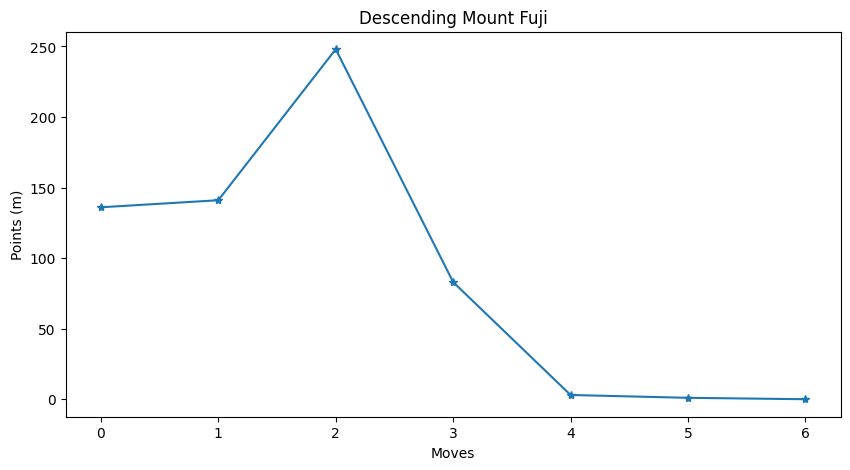

In [309]:
plt.figure(figsize=(10, 5))

plt.title("Descending Mount Fuji")

plt.xlabel("Moves")
plt.ylabel("Points (m)")
plt.plot(descending, marker="*")
plt.show()

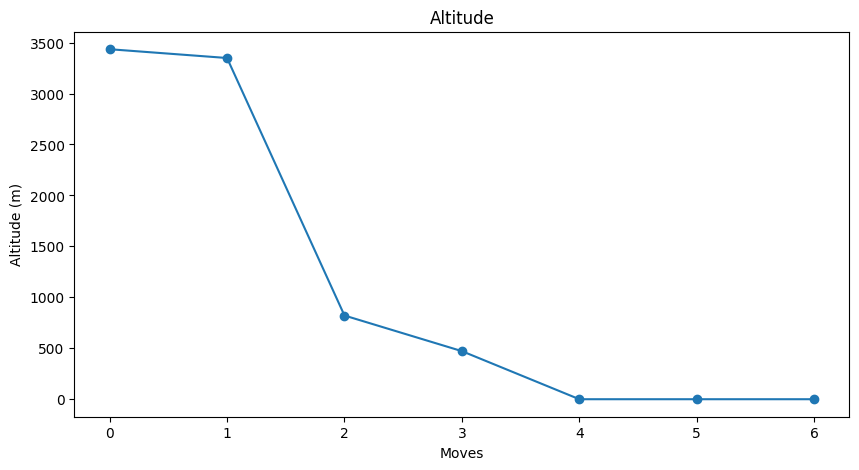

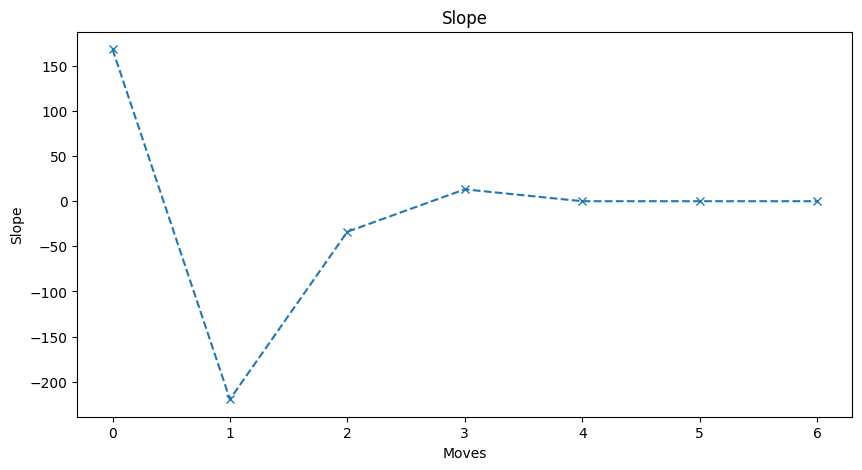

In [310]:
altitude = [elevations[i] for i in descending]

slopes = [gradient(x) for x in descending]

plt.figure(figsize=(10, 5))
plt.title("Altitude")
plt.plot(altitude, marker="o")
plt.xlabel("Moves")
plt.ylabel("Altitude (m)")
plt.show()


plt.figure(figsize=(10, 5))
plt.title("Slope")
plt.plot(slopes, linestyle="--", marker="x")
plt.xlabel("Moves")
plt.ylabel("Slope")
plt.show()

### Problem 6

In [312]:
for x in range(100, 250):
  print(descend(x))

[100, 1, 0]
[101, 2, 0]
[102, 2, 0]
[103, 20, 99, 7, 1, 0]
[104, 4, 1, 0]
[105, 6, 5, 1, 0]
[106, 1, 0]
[107, 19, 11, 4, 1, 0]
[108, 5, 1, 0]
[109, 12, 48, 118, 53, 116, 44, 9, 40, 8, 3, 1, 0]
[110, 3, 1, 0]
[111, 24, 6, 5, 1, 0]
[112, 38, 39, 8, 3, 1, 0]
[113, 31, 108, 5, 1, 0]
[114, 3, 1, 0]
[115, 30, 63, 67, 6, 5, 1, 0]
[116, 44, 9, 40, 8, 3, 1, 0]
[117, 46, 9, 40, 8, 3, 1, 0]
[118, 53, 116, 44, 9, 40, 8, 3, 1, 0]
[119, 31, 108, 5, 1, 0]
[120, 12, 48, 118, 53, 116, 44, 9, 40, 8, 3, 1, 0]
[121, 37, 0]
[122, 43, 9, 40, 8, 3, 1, 0]
[123, 31, 108, 5, 1, 0]
[124, 43, 9, 40, 8, 3, 1, 0]
[125, 78, 12, 48, 118, 53, 116, 44, 9, 40, 8, 3, 1, 0]
[126, 97, 6, 5, 1, 0]
[127, 95, 7, 1, 0]
[128, 85, 0]
[129, 93, 0]
[130, 111, 24, 6, 5, 1, 0]
[131, 113, 31, 108, 5, 1, 0]
[132, 96, 9, 40, 8, 3, 1, 0]
[133, 116, 44, 9, 40, 8, 3, 1, 0]
[134, 93, 0]
[135, 151, 115, 30, 63, 67, 6, 5, 1, 0]
[136, 141, 248, 83, 3, 1, 0]
[137, 138, 52, 64, 48, 118, 53, 116, 44, 9, 40, 8, 3, 1, 0]
[138, 52, 64, 48, 118, 53,

### Problem 7

In [313]:
def display(value):
  plt.figure(figsize=(10, 5))
  plt.title("Descending Mount Fuji")
  plt.xlabel("Moves")
  plt.ylabel("Points (m)")
  plt.plot(value, marker="*")
  plt.show()

  altitude = [elevations[i] for i in value]

  slopes = [gradient(x) for x in value]

  plt.figure(figsize=(10, 5))
  plt.title("Altitude")
  plt.plot(altitude, marker="o")
  plt.xlabel("Moves")
  plt.ylabel("Altitude (m)")
  plt.show()


  plt.figure(figsize=(10, 5))
  plt.title("Slope")
  plt.plot(slopes, linestyle="--", marker="x")
  plt.xlabel("Moves")
  plt.ylabel("Slope")
  plt.show()

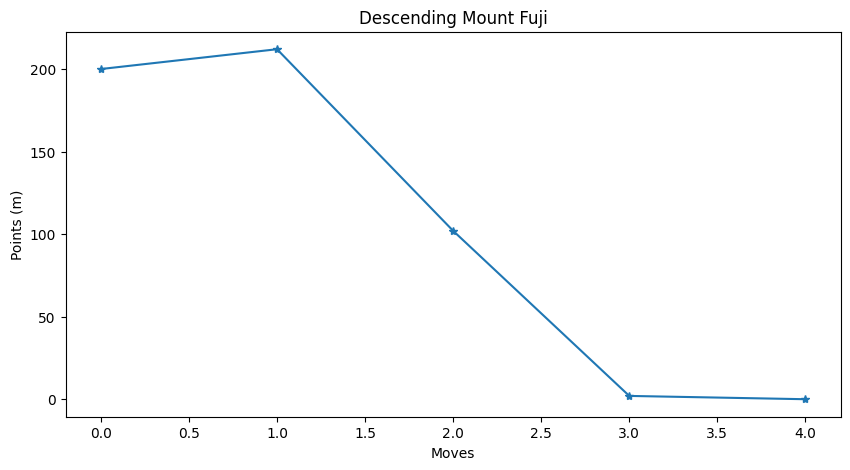

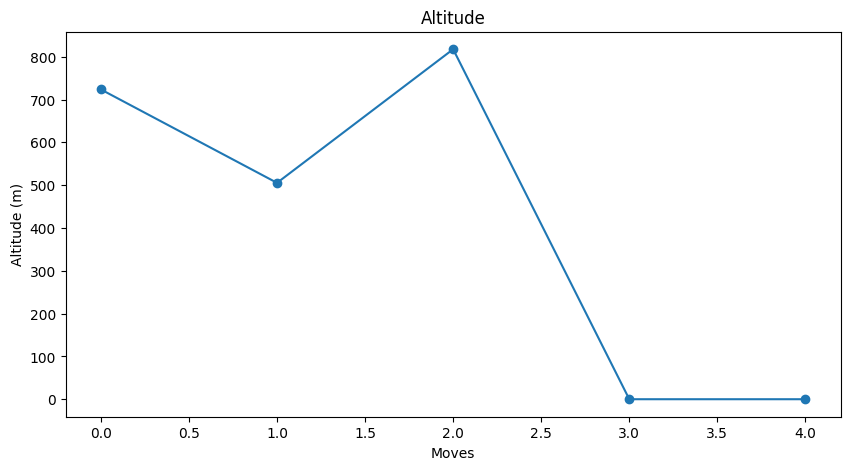

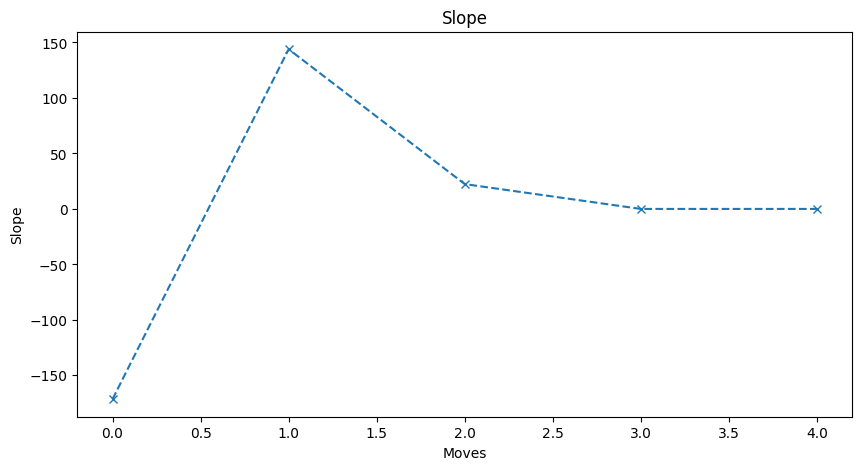

In [314]:
display(descend(200))

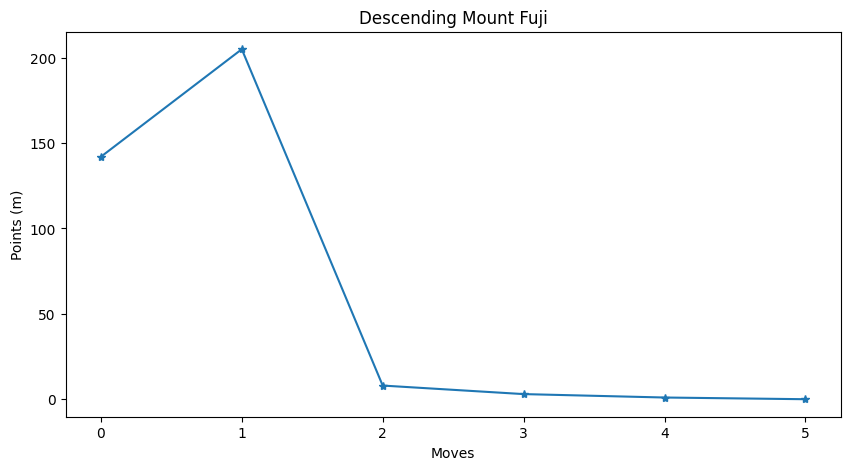

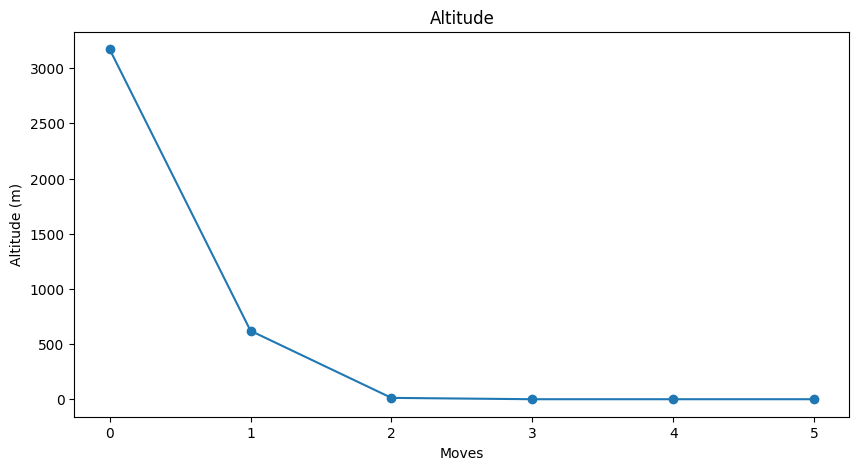

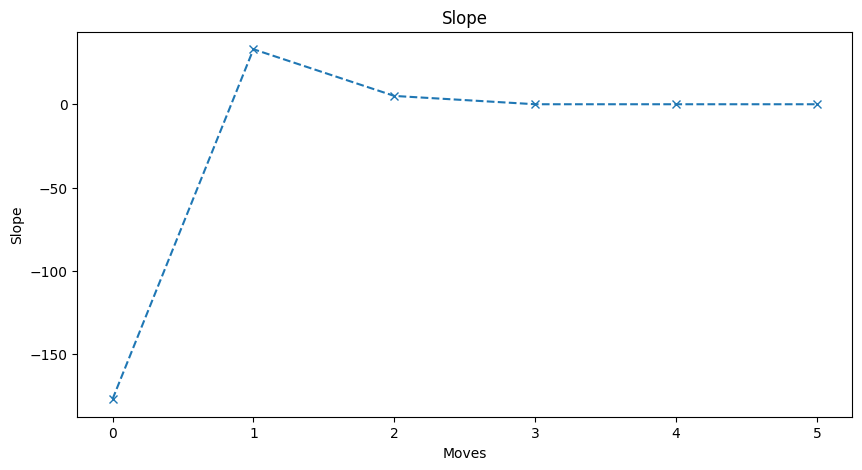

In [315]:
display(descend(142))

### Problem 8

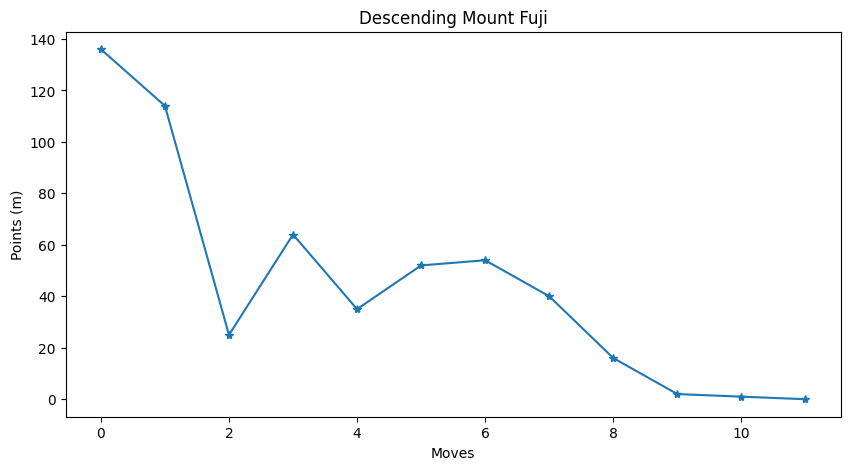

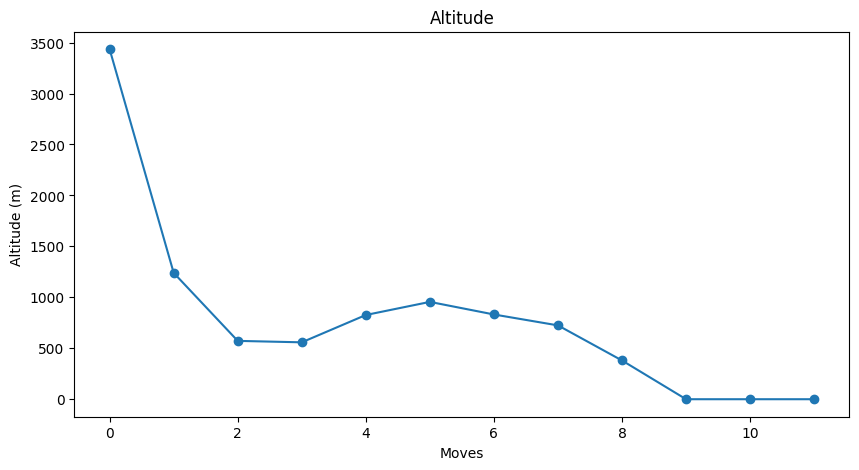

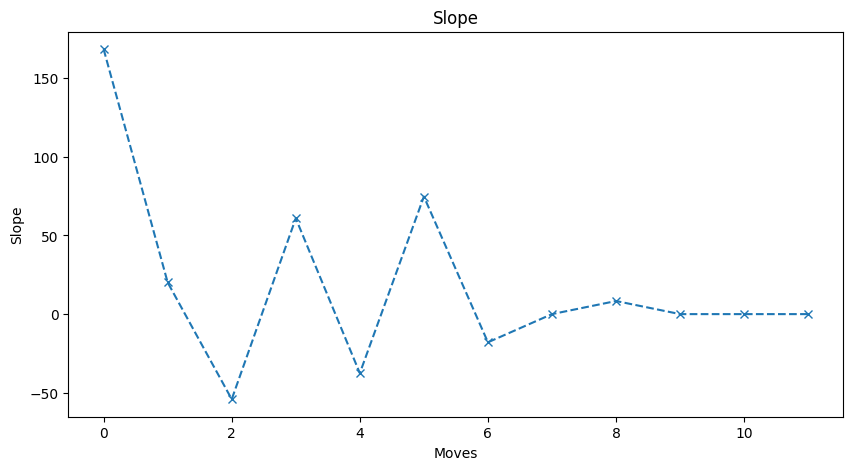

In [318]:
#Using 136 as specified in problem 4
descending = descend(136, 0.4)

display(descending)